In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Варіант №1
1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21,

22, 23, 24, 26

In [10]:
df = pd.read_csv('Downloads/NationalNames.csv').dropna()

In [11]:
df[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [12]:
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


In [15]:
df.drop_duplicates(subset = 'Name').count()['Count']

93889

In [16]:
df.groupby('Year')['Name'].nunique()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [17]:
df.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1)

Year
2008    32488
Name: Name, dtype: int64

In [18]:
df.query("Year == 2008").sort_values(by=['Count'], ascending=False)[:1]['Name'].iloc[0]

'Jacob'

In [19]:
df.query("Name == 'Jacob' and Gender == 'F'").sort_values(by=['Count'], ascending=False)[:1]['Year'].iloc[0]

2004

In [20]:
df['Neutral'] = (df['Gender'] == 'F') | (df['Gender'] == 'M')

# Групуємо дані за рік та ім'я та підраховуємо кількість унікальних гендерів
grouped = df.groupby(['Year', 'Name'])['Neutral'].nunique().reset_index()

# Обчислюємо кількість гендерно нейтральних імен у кожному році
neutral_names_count = grouped.groupby('Year').size()

# Знаходимо рік з найбільшою кількістю гендерно нейтральних імен
year_with_max_neutral_names = neutral_names_count.idxmax()

print("Рік з найбільшою кількістю гендерно нейтральних імен:", year_with_max_neutral_names)

Рік з найбільшою кількістю гендерно нейтральних імен: 2008


In [21]:
births_per_year = df.groupby('Year')['Count'].sum()

print("Загальна кількість народжень за рік:")
print(births_per_year)

Загальна кількість народжень за рік:
Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [22]:
births_per_year = df.groupby('Year')['Count'].sum()

# Знаходимо рік з найбільшою кількістю народжених дітей
year_with_most_births = births_per_year.idxmax()

print("Рік з найбільшою кількістю народжених дітей:", year_with_most_births)

Рік з найбільшою кількістю народжених дітей: 1957


In [23]:
gender_counts_per_year = df.groupby(['Year', 'Gender'])['Count'].sum()

print("Кількість дівчаток та хлопчиків, які народились кожного року:")
print(gender_counts_per_year)

Кількість дівчаток та хлопчиків, які народились кожного року:
Year  Gender
1880  F           90993
      M          110491
1881  F           91954
      M          100745
1882  F          107850
                 ...   
2012  M         1889414
2013  F         1745339
      M         1881463
2014  F         1768775
      M         1901376
Name: Count, Length: 270, dtype: int64


In [24]:
gender_counts_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Підраховуємо кількість років, коли народжувалося більше дівчаток, ніж хлопчиків
years_more_girls = (gender_counts_per_year['F'] > gender_counts_per_year['M']).sum()

print("Кількість років, коли народжувалося більше дівчаток, ніж хлопчиків:", years_more_girls)

Кількість років, коли народжувалося більше дівчаток, ніж хлопчиків: 54


In [25]:
barbara_male_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

print("Кількість разів, коли хлопчиків називали Barbara:", barbara_male_count)


Кількість разів, коли хлопчиків називали Barbara: 4139


In [26]:
earliest_year = df['Year'].min()
latest_year = df['Year'].max()

# Різниця між найстаршим та наймолодшим роками покаже, скільки років проводилось спостереження
observation_years = latest_year - earliest_year + 1

print("Скільки років проводилось спостереження:", observation_years)

Скільки років проводилось спостереження: 135


In [28]:
name_counts = df.groupby('Name')['Count'].sum()

# Знаходимо найменш популярні імена
unpopular_names = name_counts[name_counts == name_counts.min()]

# Вибираємо серед непопулярних імен те, яке було використане найбільше разів
most_popular_unpopular_name = df[df['Name'].isin(unpopular_names.index)].groupby('Name')['Count'].sum().idxmax()

print("Найпопулярніше серед непопулярних імен:", most_popular_unpopular_name)

Найпопулярніше серед непопулярних імен: Aabid


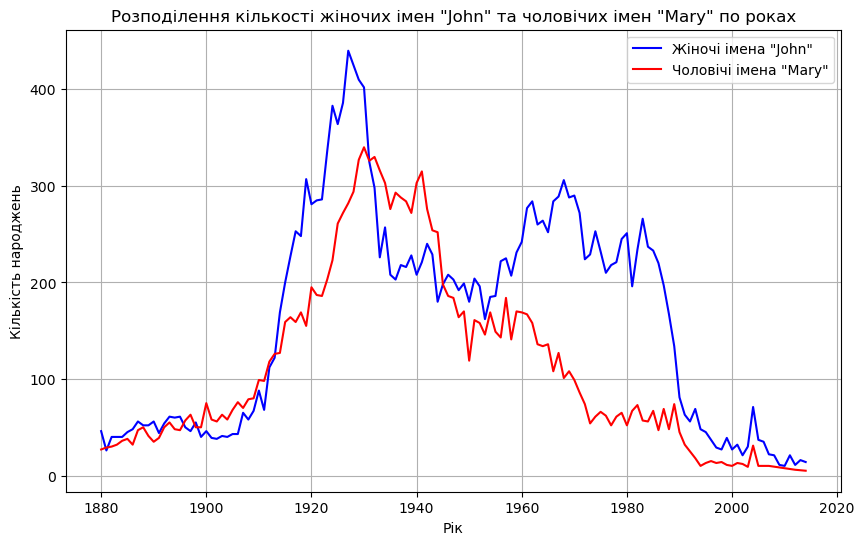

In [29]:
john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

# Групуємо дані за роком та підраховуємо загальну кількість народжень для кожного року
john_counts = john_data.groupby('Year')['Count'].sum()
mary_counts = mary_data.groupby('Year')['Count'].sum()

# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(john_counts.index, john_counts.values, label='Жіночі імена "John"', color='blue')
plt.plot(mary_counts.index, mary_counts.values, label='Чоловічі імена "Mary"', color='red')

# Налаштування відображення
plt.title('Розподілення кількості жіночих імен "John" та чоловічих імен "Mary" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend()
plt.grid(True)

# Показати графік
plt.show()